In [2]:
# 실습 패키지
from sklearn.datasets import load_boston

# 기계학습 모델 구축 및 평가 패키지

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정

plt.rc('font',family = 'Malgun Gothic')

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

import warnings
warnings.filterwarnings(action="ignore")

In [32]:
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')


In [40]:
test_df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1915,2015,대형,6.8,159,23.0,LPG,0,2359,1935,수동
1,1164,2012,소형,13.3,108,13.9,가솔린,0,1396,1035,자동
2,2817,2015,중형,14.4,184,41.0,디젤,0,1995,1792,자동
3,2160,2015,대형,10.9,175,46.0,디젤,0,2497,2210,수동
4,1915,2015,대형,6.4,159,23.0,LPG,0,2359,1935,자동
5,1560,2015,소형,18.0,136,30.6,디젤,0,1582,1160,자동
6,2260,2015,준중형,13.9,184,41.0,디젤,0,1995,1611,수동
7,1430,2015,대형,8.9,133,26.5,디젤,0,2497,1696,수동
8,2260,2015,준중형,12.5,184,41.0,디젤,0,1995,1611,자동
9,1690,2015,준중형,12.8,215,21.3,가솔린,0,1999,1216,수동


In [34]:
train_df


,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [44]:
df = pd.concat([train_df,test_df])
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
26,6910,2015,대형,8.9,334,40.3,가솔린,0,3778,1915,자동
27,2545,2015,대형,8.7,175,46.0,디젤,0,2497,2383,수동
28,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
29,870,2010,소형,13.0,95,12.7,가솔린,0,1399,1046,자동


In [53]:
X = pd.DataFrame(df, columns=['년식','연비','마력','토크','배기량','중량'])
y = pd.DataFrame(df, columns=['가격'])

X



,년식,연비,마력,토크,배기량,중량
0,2015,11.8,172,21.0,1999,1300
1,2015,12.3,204,27.0,1591,1300
2,2015,15.0,100,13.6,1368,1035
3,2014,14.0,140,17.0,1591,1090
4,2015,9.6,175,46.0,2497,1990
...,...,...,...,...,...,...
26,2015,8.9,334,40.3,3778,1915
27,2015,8.7,175,46.0,2497,2383
28,2015,9.6,175,46.0,2497,1990
29,2010,13.0,95,12.7,1399,1046


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2022)

In [55]:
X_train =sm.add_constant(X_train)

model = sm.OLS(y_train,X_train, axis=1)

model_trained =model.fit()

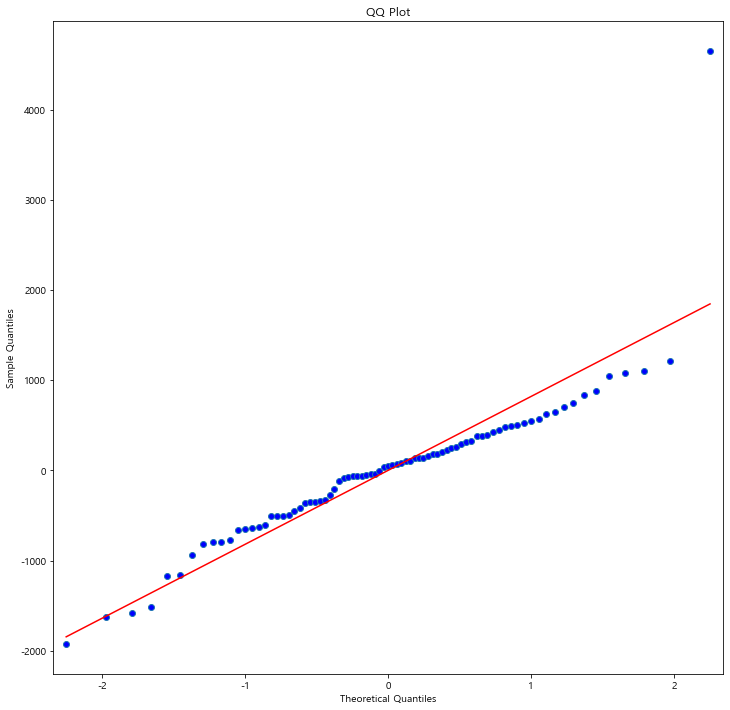

In [56]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] =False # 음수 폰트 깨짐방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line="s",color='#1f77b4',ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

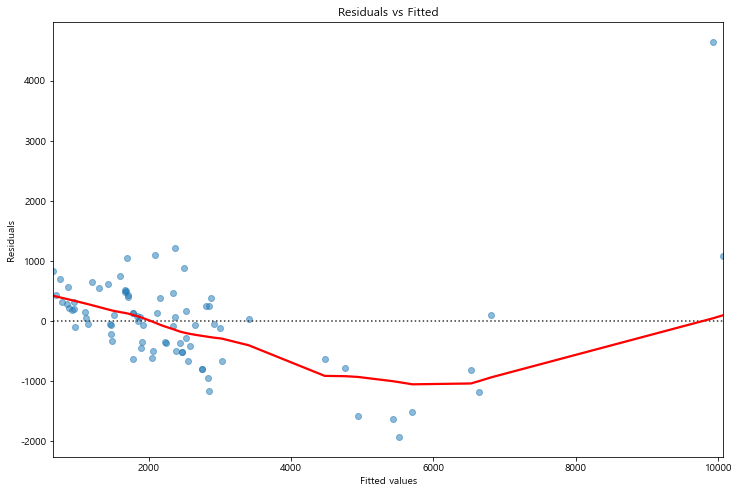

In [57]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)


sns.residplot(model_fitted_y,y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'},ax=ax)

ax.title.set_text("Residuals vs Fitted")
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [58]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     59.90
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.03e-26
Time:                        23:28:56   Log-Likelihood:                -658.37
No. Observations:                  81   AIC:                             1331.
Df Residuals:                      74   BIC:                             1347.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.579e+05   2.09e+05      0.756      0.4

In [73]:
model = sm.OLS(y_train, X_train.drop(['년식','토크','중량'],axis=1))

model_trained = model.fit()

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           3.42e-28
Time:                        23:37:54   Log-Likelihood:                -661.48
No. Observations:                  81   AIC:                             1331.
Df Residuals:                      77   BIC:                             1341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5319.7897    824.668     -6.451      0.0

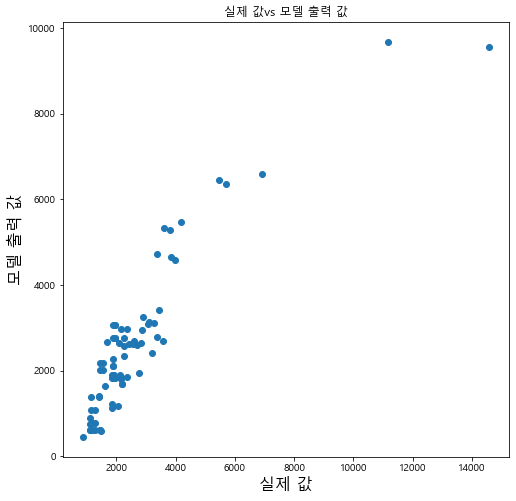

In [79]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8,8))

plt.title('실제 값vs 모델 출력 값')
plt.scatter(y_train,y_train_pred)
plt.plot([],[], ls="--",c='red')
plt.xlabel('실제 값',size=16)
plt.ylabel('모델 출력 값',size=16)
plt.xlim()
plt.ylim()
plt.show()

In [70]:
X_test = sm.add_constant(X_test)

In [71]:
y_test_pred = model_trained.predict(X_test.drop(['년식','토크','중량'],axis=1))

y_test_pred.head(5)

62    1389.177457
0     1886.829123
32    2278.385014
17    5320.511952
51    2000.297739
dtype: float64

In [72]:
### 4.3.1 Mean Squared Error (평균 제곱 오차)

print(mean_squared_error(y_test, y_test_pred))

### 4.3.2 Root Mean Squared Error (제곱급 평균 제곱 오차)

print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

### 4.3.3 Mean Absolute Error (평균 절대 오차)

print(mean_absolute_error(y_test, y_test_pred))

### 4.3.4 Mean Absolute Percentage Error (평균 절대 백분율 오차)

def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test,y_test_pred))

### 4.3.5 squared(결정계수)

print(r2_score(y_test,y_test_pred))

# 0.7이상이면 적합함..

232206.9875516349
481.87860250444294
405.39204897013195
51.45627113558897
0.7770242606416486
